In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

### 1. 定义逻辑回归函数

In [17]:
def sigm(X, theta):
    return 1./(1. + np.exp(-np.dot(X, theta) + 9.))

### 2. 生成模拟数据

In [19]:
# 设置一些变量
xlim = 4.
m = 300
n = 2
train_n = 200

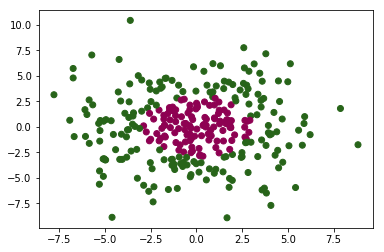

In [25]:
np.random.seed(20180824)
x1 = np.random.randn(m, 1)*3
x2 = np.random.randn(m, 1)*3

X = np.hstack((x1**2, x2**2))
Theta = np.ones(n).reshape(n, 1)
y = np.round(sigm(X, Theta))

_ = plt.scatter(x1, x2, c=y, cmap='PiYG')

In [28]:
train_X = X[:train_n]
test_X = X[train_n: ]

train_y = y[:train_n]
test_y = y[train_n: ]

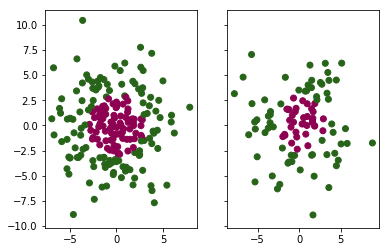

In [29]:
fig, ax = plt.subplots(1, 2, sharey=True)
_ = ax[0].scatter(x1[: train_n], x2[: train_n], c=train_y, cmap='PiYG')
_ = ax[1].scatter(x1[train_n :], x2[train_n: ], c=test_y, cmap='PiYG')

In [53]:
lgr = linear_model.LogisticRegression()
_ = lgr.fit(train_X, train_y.reshape(train_n))
t1, t2 = lgr.coef_.ravel()
t0 = lgr.intercept_
t0, t1, t2

(array([-4.51914259]), 0.47054825534131717, 0.5045858489524252)

In [55]:
lgr.score(test_X, test_y)

0.98999999999999999

- 所以分界线方程是 ： $$\normalsize t_1 x_1^2 + t_2 x_2^2 + t_0 = 0 \quad x_1^2 \le \frac{-t_0}{t_1}$$

C:\Users\phart\Anaconda3\envs\mytf\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\phart\Anaconda3\envs\mytf\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


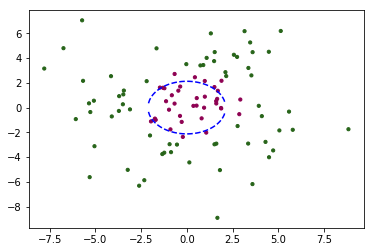

In [66]:
c_x = np.linspace(-np.sqrt(-t0/t1), np.sqrt(-t0/t1), 100)
c_up = np.sqrt(-t0 - c_x**2)
c_low = -np.sqrt(-t0 - c_x**2)

y_ = lgr.predict(test_X)
_ = plt.scatter(x1[train_n: ] , x2[train_n: ], c=test_y, cmap='PiYG', s=10)
# _ = plt.scatter(x1[:train_n] , x2[:train_n], c=train_y, cmap='PiYG', s=10)
_ = plt.plot(c_x, c_up, 'b--')
_ = plt.plot(c_x, c_low, 'b--')